File name needs to be updated

In [14]:
import pandas as pd
from IPython.display import display
import re
from datetime import datetime
import matplotlib.pyplot as plt
# read file
df = pd.read_csv(r'C:\Users\sabri\Documents\GitHub\Springboard\G0156_Annual Revenue\01-07_G0156.csv',sep = ',', header = None, encoding = 'unicode_escape') 
#add header 
df.columns = ['WO#', 'Company', 'Customer', 'Quantity', 'Unit_Price', 'Discount', 'Revenue', 'Time', 'Priority', 'Item_Code', 'Billing_Desc', 'Invoice_Data', 'Data_Created', 'Territory', 'Location','Lab', 'Salesperson']


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WO#           62 non-null     object
 1   Company       62 non-null     object
 2   Customer      62 non-null     object
 3   Quantity      62 non-null     int64 
 4   Unit_Price    62 non-null     int64 
 5   Discount      62 non-null     int64 
 6   Revenue       62 non-null     int64 
 7   Time          62 non-null     object
 8   Priority      62 non-null     object
 9   Item_Code     62 non-null     object
 10  Billing_Desc  62 non-null     object
 11  Invoice_Data  62 non-null     object
 12  Data_Created  62 non-null     object
 13  Territory     53 non-null     object
 14  Location      62 non-null     object
 15  Lab           62 non-null     object
 16  Salesperson   62 non-null     object
dtypes: int64(4), object(13)
memory usage: 8.4+ KB


In [3]:
df.head()

,WO#,Company,Customer,Quantity,Unit_Price,Discount,Revenue,Time,Priority,Item_Code,Billing_Desc,Invoice_Data,Data_Created,Territory,Location,Lab,Salesperson
0,22-00380,DUPONT,STAPHANIE LOUIE,-14,2400,0,-33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,4/28/2022 0:00,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG
1,22-00380,DUPONT,STAPHANIE LOUIE,14,2400,0,33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,4/28/2022 15:21,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG
2,22-00380,DUPONT,STAPHANIE LOUIE,14,2400,0,33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,5/31/2022 0:00,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG
3,22-02102,JSR MICRO INC,SIRISH RIMAL,1,832,0,832,EA,N,G0156-LCU-N-R,LC-MS Analysis,3/9/2022 0:00,2/18/2022 15:44,PACW,FREMONT,ORGANIC,JERRY.SMITH
4,22-02102,JSR MICRO INC,SIRISH RIMAL,1,832,0,832,EA,N,G0156-LCU-N-R,LC-MS Analysis,3/9/2022 0:00,2/18/2022 15:44,PACW,FREMONT,ORGANIC,JERRY.SMITH


calculate # of Priority samples

In [4]:
# Total # of priority samples 
Priority = df[df['Priority']=='P']['Quantity'].sum()
print('Total number of priority samples is ', Priority)

Total number of priority samples is  28


Figure out # of companies worked with and respective sample number and revenue

In [5]:
#extract month from Invoice_Data column
Month=[datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in df['Invoice_Data']]

In [6]:
#add a column 'Month' to the df
df['Month']=Month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WO#           62 non-null     object
 1   Company       62 non-null     object
 2   Customer      62 non-null     object
 3   Quantity      62 non-null     int64 
 4   Unit_Price    62 non-null     int64 
 5   Discount      62 non-null     int64 
 6   Revenue       62 non-null     int64 
 7   Time          62 non-null     object
 8   Priority      62 non-null     object
 9   Item_Code     62 non-null     object
 10  Billing_Desc  62 non-null     object
 11  Invoice_Data  62 non-null     object
 12  Data_Created  62 non-null     object
 13  Territory     53 non-null     object
 14  Location      62 non-null     object
 15  Lab           62 non-null     object
 16  Salesperson   62 non-null     object
 17  Month         62 non-null     int64 
dtypes: int64(5), object(13)
memory usage: 8.8+ KB


In [7]:
#generate a summary table (w/o priority sample #)
df_summary = df.groupby(['Month','Company']).sum()[['Quantity','Revenue']]
df_summary

Quantity  Revenue
Month Company                             
3     JSR MICRO INC             3     2496
4     DUPONT                    0        0
      JSR MICRO INC             8    13312
      NALCO WATER               9     7470
5     DUPONT                   14    33600
      JSR MICRO INC            15    12480
6     JSR MICRO INC            11    14144
7     JSR MICRO INC             4     3328
      KANTO CORPORATION         9     7488

In [8]:
#goal: priority df, if P use 'quantity', if N use '0'. So the final df has the same # of rows before concat with df_summary


df_priority=df[df['Priority']=='P']
df_priority=df_priority.groupby(['Month','Company']).sum()[['Quantity']]
df_priority# #of rows is different from df_summary

Quantity
Month Company                
4     DUPONT                0
      JSR MICRO INC         8
5     DUPONT               14
6     JSR MICRO INC         6

In [9]:
#calculate monthly summary (w/o priority sample #)
df_monthly=df.groupby(['Month']).sum()[['Quantity', 'Revenue']]
df_monthly

,Quantity,Revenue
Month,,
3,3,2496
4,17,20782
5,29,46080
6,11,14144
7,13,10816


In [10]:
#annual total revenue
G0156_Revenue_2022 = df_monthly['Revenue'].sum()
G0156_Revenue_2022

94318

In [11]:
#annual total # of samples
G0156_Samples_2022 = df_monthly['Quantity'].sum()
G0156_Samples_2022

73

Further dig into the data, monthly revenue, monthly # of samplels, etc.

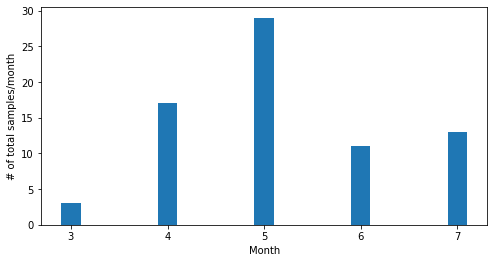

In [12]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Quantity'],  width=0.2)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('# of total samples/month')
plt.show()

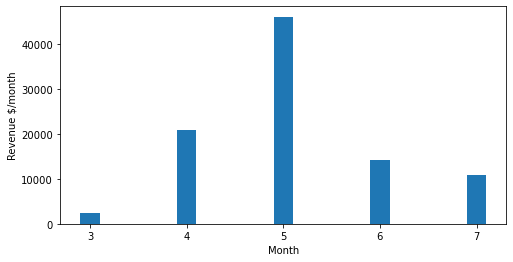

In [13]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Revenue'],  width=0.2)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('Revenue $/month')
plt.show()